# models comparison

this is model comparison accross models. The results are only related to one of the color, number and both models.  if you wanna change the color, number and both models, you have to change it through the file_both_greedy for example, if you put 11 for all, it wil be color model, if you put 12 it will be number and if you put 14 it will be both model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit


# BIC and mcFadden_R2
the first way to compare models is bayesian information criterion; BICs don't have a meaning by themselves it's the delta BIC between models that decides which model in better. the model with smaller BIC explains the behavior better.
## interpretation:

about BIC difference absolute amount:
0–2: Not worth more than a bare mention
2–6: good
6–10: Strong
+10: Very strong

In [2]:
output_dir = r"14_RL_agent_TDlearn_output_model_comparison_across_models"
os.makedirs(output_dir, exist_ok=True)

file_both_greedy = "12_RL_agent_TDlearn_output/models_evaluation.csv"
file_both_softmax = "12_RL_agent_TDlearn_output_softmax/models_evaluation.csv"
file_both_rs = "12_RL_agent_TDlearn_output_risk_sensitive/models_evaluation.csv"
file_both_wsls = "12_RL_agent_TDlearn_output_wsls/models_evaluation.csv"


df_both_greedy = pd.read_csv(file_both_greedy)
df_both_softmax = pd.read_csv(file_both_softmax)
df_both_wsls = pd.read_csv(file_both_wsls)
df_both_rs = pd.read_csv(file_both_rs)
df_both_rs

,participants,best_alpha_plus,best_alpha_minus,best_beta,BIC,AIC,accuracy,precision,sensitivity_recall,specificity,f1_score,mcFadden_r2,r2
0,07_11_2024_17_23_43,0.396304,0.013914,5.371806,264.523173,257.326329,0.755556,0.757812,0.734848,0.775362,0.746154,0.322958,0.021739
1,08_11_2024_13_03_29,0.587892,0.133031,5.371806,253.854449,246.657605,0.696296,0.755245,0.696774,0.695652,0.724832,0.341234,-0.242076
2,11_11_2024_16_46_44,0.262406,0.002606,5.371806,255.483276,248.286432,0.729630,0.720588,0.736842,0.722628,0.728625,0.347247,-0.081719
3,12_11_2024_00_15_17,0.544950,0.002606,6.300530,183.537120,176.340276,0.822222,0.829630,0.817518,0.827068,0.823529,0.539493,0.288733
4,13_11_2024_10_46_21,0.288735,0.002606,7.015236,204.472837,197.275993,0.792593,0.798507,0.786765,0.798507,0.792593,0.483612,0.170325
5,13_11_2024_14_45_52,0.154915,0.027044,6.289182,265.560713,258.363869,0.718519,0.718310,0.739130,0.696970,0.728571,0.320185,-0.126482
6,14_11_2024_21_46_47,0.406427,0.027044,8.609170,149.556167,142.359323,0.888889,0.919118,0.868056,0.912698,0.892857,0.629161,0.553571
7,15_11_2024_11_43_48,0.086350,0.002606,9.235039,214.900193,207.703349,0.781481,0.751724,0.825758,0.739130,0.787004,0.455580,0.125494
8,17_11_2024_15_25_39,0.181624,0.002606,7.274003,217.367008,210.170164,0.777778,0.738462,0.786885,0.770270,0.761905,0.445469,0.102791
9,17_11_2024_23_57_47,0.544950,0.002606,5.371806,258.495599,251.298755,0.729630,0.770992,0.701389,0.761905,0.734545,0.337176,-0.086310


In [3]:
df_both_greedy

,participants,best_alpha,best_beta,BIC,AIC,accuracy,precision,sensitivity_recall,specificity,f1_score,mcFadden_r2,r2
0,07_11_2024_17_23_43,0.065052,0.489453,302.501920,295.305076,0.696296,0.686567,0.696970,0.695652,0.691729,0.221455,-0.215415
1,08_11_2024_13_03_29,0.366362,0.489453,302.501920,295.305076,0.688889,0.732026,0.722581,0.643478,0.727273,0.209166,-0.272370
2,11_11_2024_16_46_44,0.046450,0.489453,307.009677,299.812833,0.648148,0.635714,0.669173,0.627737,0.652015,0.209564,-0.407716
3,12_11_2024_00_15_17,0.034389,0.349210,263.939420,256.742576,0.685185,0.709677,0.642336,0.729323,0.674330,0.324651,-0.259536
4,13_11_2024_10_46_21,0.304614,0.417411,284.204845,277.008001,0.659259,0.664179,0.654412,0.664179,0.659259,0.270587,-0.363038
5,13_11_2024_14_45_52,0.065052,0.417411,289.535829,282.338985,0.674074,0.681159,0.681159,0.666667,0.681159,0.256109,-0.304348
6,14_11_2024_21_46_47,0.456070,0.417411,286.870337,279.673493,0.692593,0.747967,0.638889,0.753968,0.689139,0.261124,-0.235119
7,15_11_2024_11_43_48,0.046450,0.417411,289.535829,282.338985,0.677778,0.655172,0.719697,0.637681,0.685921,0.256109,-0.289526
8,17_11_2024_15_25_39,0.249292,0.489453,311.517434,304.320591,0.622222,0.571429,0.655738,0.594595,0.610687,0.192235,-0.525255
9,17_11_2024_23_57_47,0.025419,0.489453,302.501920,295.305076,0.622222,0.672131,0.569444,0.682540,0.616541,0.219228,-0.517857


# models evaluation metrics

Saved: 14_RL_agent_TDlearn_output_model_comparison_across_models\models_evaluation_metrics.pdf


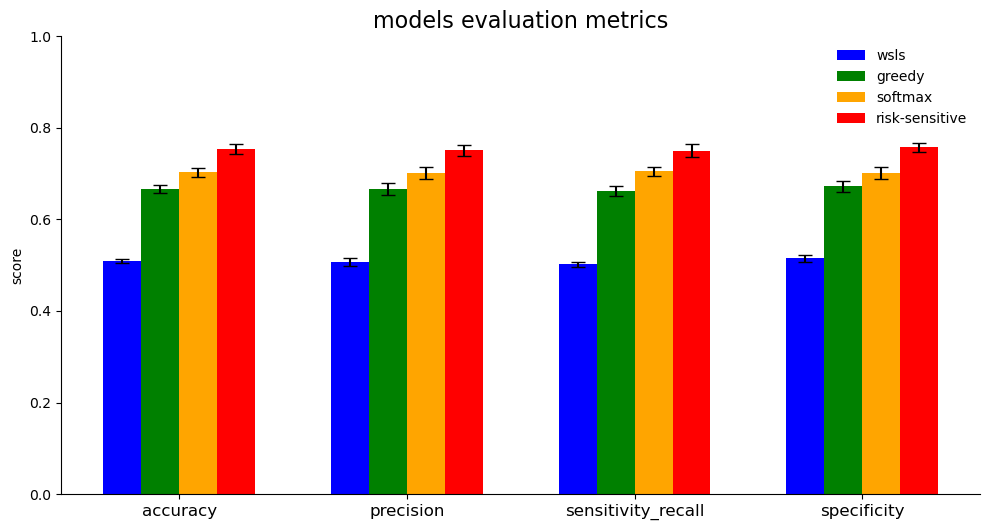

In [4]:
metrics = ['accuracy', 'precision', 'sensitivity_recall', 'specificity']
conditions = ['wsls','greedy', 'softmax', 'risk-sensitive']
colors = ['blue', 'green', 'orange', 'red']

# Compute means and SEMs
means = [
    df_both_wsls[metrics].mean().values,
    df_both_greedy[metrics].mean().values,
    df_both_softmax[metrics].mean().values,
    df_both_rs[metrics].mean().values
]

sems = [
    df_both_wsls[metrics].sem().values,
    df_both_greedy[metrics].sem().values,
    df_both_softmax[metrics].sem().values,
    df_both_rs[metrics].sem().values
]

means = np.array(means)
sems = np.array(sems)

x = np.arange(len(metrics)) * 1.5  # Add spacing between metric groups
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars = []

for i in range(len(conditions)):
    bars.append(
        ax.bar(
            x + (i - 1.5) * width,  # Shift bars to center around each metric
            means[i],
            width,
            yerr=sems[i],
            capsize=5,
            label=conditions[i],
            color=colors[i]
        )
    )

# Labels and aesthetics
ax.set_ylabel('score')
ax.set_title('models evaluation metrics', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0, 1)
legend = ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.9])

filename = os.path.join(output_dir, "models_evaluation_metrics.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()

# BIC and R2 calculations

In [16]:
# Extract metrics for each model
bic_wsls = df_both_wsls["BIC"]
bic_greedy = df_both_greedy["BIC"]
bic_softmax = df_both_softmax["BIC"]
bic_rs = df_both_rs["BIC"]

aic_wsls = df_both_wsls["AIC"]
aic_greedy = df_both_greedy["AIC"]
aic_softmax = df_both_softmax["AIC"]
aic_rs = df_both_rs["AIC"]

mcFadden_r2_wsls = df_both_wsls["mcFadden_r2"]
mcFadden_r2_greedy = df_both_greedy["mcFadden_r2"]
mcFadden_r2_softmax = df_both_softmax["mcFadden_r2"]
mcFadden_r2_rs = df_both_rs["mcFadden_r2"]

# Compute deltas: model1 - model2
delta_bic_wsls_greedy = bic_wsls - bic_greedy
delta_bic_wsls_softmax = bic_wsls - bic_softmax
delta_bic_wsls_rs = bic_wsls - bic_rs
delta_bic_greedy_softmax = bic_greedy - bic_softmax
delta_bic_greedy_rs = bic_greedy - bic_rs
delta_bic_softmax_rs = bic_softmax - bic_rs

delta_aic_wsls_greedy = aic_wsls - aic_greedy
delta_aic_wsls_softmax = aic_wsls - aic_softmax
delta_aic_wsls_rs = aic_wsls - aic_rs
delta_aic_greedy_softmax = aic_greedy - aic_softmax
delta_aic_greedy_rs = aic_greedy - aic_rs
delta_aic_softmax_rs = aic_softmax - aic_rs

delta_mcFadden_r2_wsls_greedy = mcFadden_r2_wsls - mcFadden_r2_greedy
delta_mcFadden_r2_wsls_softmax = mcFadden_r2_wsls - mcFadden_r2_softmax
delta_mcFadden_r2_wsls_rs = mcFadden_r2_wsls - mcFadden_r2_rs
delta_mcFadden_r2_greedy_softmax = mcFadden_r2_greedy - mcFadden_r2_softmax
delta_mcFadden_r2_greedy_rs = mcFadden_r2_greedy - mcFadden_r2_rs
delta_mcFadden_r2_softmax_rs = mcFadden_r2_softmax - mcFadden_r2_rs


# BIC and R2 calculations visualizations

/var/folders/m0/1m7yg24j47s029hc4wgp1v3m0000gn/T/ipykernel_75694/4162856340.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_bic = axs[0].boxplot(
/var/folders/m0/1m7yg24j47s029hc4wgp1v3m0000gn/T/ipykernel_75694/4162856340.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_aic = axs[1].boxplot(
/var/folders/m0/1m7yg24j47s029hc4wgp1v3m0000gn/T/ipykernel_75694/4162856340.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_mcFadden = axs[2].boxplot(


Saved: 14_RL_agent_TDlearn_output_model_comparison_across_models/models_evaluation_comparison_bic_r2_all_pairs.pdf


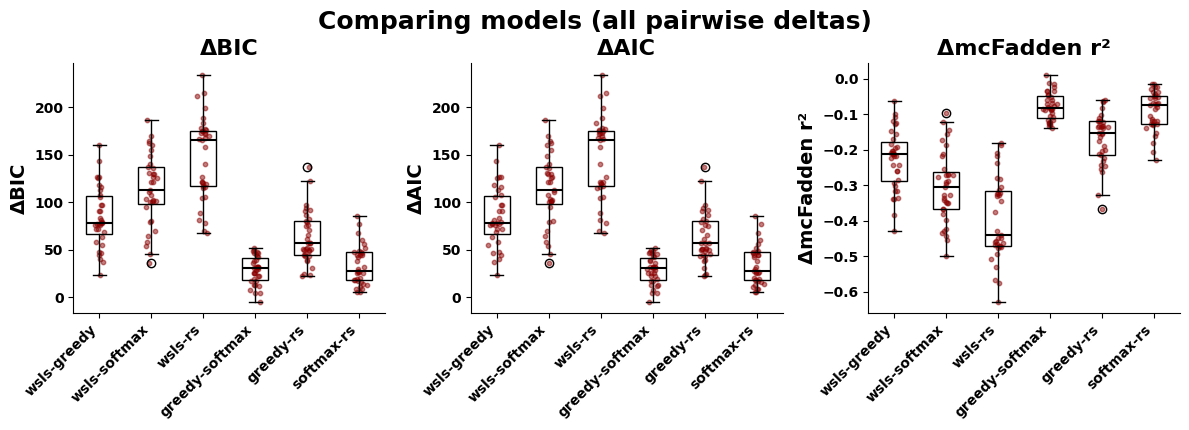

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Prepare deltas for all pairwise comparisons (wsls, greedy, softmax, rs)
bic_deltas = [
    bic_wsls - bic_greedy,
    bic_wsls - bic_softmax,
    bic_wsls - bic_rs,
    bic_greedy - bic_softmax,
    bic_greedy - bic_rs,
    bic_softmax - bic_rs
]
aic_deltas = [
    aic_wsls - aic_greedy,
    aic_wsls - aic_softmax,
    aic_wsls - aic_rs,
    aic_greedy - aic_softmax,
    aic_greedy - aic_rs,
    aic_softmax - aic_rs
]
mcFadden_r2_deltas = [
    mcFadden_r2_wsls - mcFadden_r2_greedy,
    mcFadden_r2_wsls - mcFadden_r2_softmax,
    mcFadden_r2_wsls - mcFadden_r2_rs,
    mcFadden_r2_greedy - mcFadden_r2_softmax,
    mcFadden_r2_greedy - mcFadden_r2_rs,
    mcFadden_r2_softmax - mcFadden_r2_rs
]

labels = [
    "wsls-greedy", "wsls-softmax", "wsls-rs",
    "greedy-softmax", "greedy-rs", "softmax-rs"
]

# Plot BIC deltas
box_bic = axs[0].boxplot(
    bic_deltas, vert=True, patch_artist=True, labels=labels,
    showmeans=False,
    medianprops={'color': 'black', 'linewidth': 1.5}
)
for box in box_bic['boxes']:
    box.set(facecolor='none')
for i, delta in enumerate(bic_deltas):
    axs[0].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color='#8b0000')
axs[0].set_title("ΔBIC", fontsize=16, fontweight='bold')
axs[0].set_ylabel("ΔBIC", fontsize=14, fontweight='bold')

# Plot AIC deltas
box_aic = axs[1].boxplot(
    aic_deltas, vert=True, patch_artist=True, labels=labels,
    showmeans=False,
    medianprops={'color': 'black', 'linewidth': 1.5}
)
for box in box_aic['boxes']:
    box.set(facecolor='none')
for i, delta in enumerate(aic_deltas):
    axs[1].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color='#8b0000')
axs[1].set_title("ΔAIC", fontsize=16, fontweight='bold')
axs[1].set_ylabel("ΔAIC", fontsize=14, fontweight='bold')

# Plot McFadden R2 deltas
box_mcFadden = axs[2].boxplot(
    mcFadden_r2_deltas, vert=True, patch_artist=True, labels=labels,
    showmeans=False,
    medianprops={'color': 'black', 'linewidth': 1.5}
)
for box in box_mcFadden['boxes']:
    box.set(facecolor='none')
for i, delta in enumerate(mcFadden_r2_deltas):
    axs[2].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color='#8b0000')
axs[2].set_title("ΔmcFadden r²", fontsize=16, fontweight='bold')
axs[2].set_ylabel("ΔmcFadden r²", fontsize=14, fontweight='bold')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', labelsize=10)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.suptitle('Comparing models (all pairwise deltas)', fontsize=18, fontweight='bold', y=0.85)
plt.tight_layout(rect=[0, 0, 1, 0.9])

filename = os.path.join(output_dir, "models_evaluation_comparison_bic_r2_all_pairs.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()
